In [64]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Generar un data Frame , para los datos generados 

In [65]:
# Simulación de datos (deberías tener tus propios datos)
np.random.seed(42)

n = 10000  # Número de muestras
#'Tipo_Roca': np.random.choice([1, 2, 3], size=n),  # Valores codificados (1: Granito, 2: Limestone, 3: Shale)

# Simulando un DataFrame con las nuevas características
df = pd.DataFrame({
    'Frecuencia_Chasquido_Hz': np.random.randint(10, 200, size=n),
    'Amplitud_Chasquido_dB': np.random.randint(80, 200, size=n),
    'Esfuerzo_Vertical_MPa': np.random.uniform(5, 50, size=n),
    'Esfuerzo_Horizontal_MPa': np.random.uniform(2.5, 35, size=n),
    'Profundidad': np.random.uniform(50, 1500, size=n),
    'Humedad_Roca_%': np.random.uniform(0.5, 5, size=n),
    'Temperatura': np.random.uniform(15, 50, size=n),
    'Tipo_Fractura': np.random.choice([1,2], size=n),  # Valores codificados (3: Fractura Baja, 5: Fractura Alta),
    'Resistencia_Compresion_MPa': np.random.uniform(100, 250, size=n),
    'Modulo_Elasticidad_MPa': np.random.uniform(50, 70, size=n),
})

#'Historial_Fallos': np.random.choice([0, 1], size=n),
#'Angulo_Inclinacion': np.random.uniform(10, 60, size=n),
#'Tipo_Sostenimiento_Previo': np.random.choice([0, 1, 2, 3], size=n)

Gernerar Pulsaciones en un toma de datso de 8 horas , una jornada 

In [66]:
def generar_pulsaciones(row):
    if row['Esfuerzo_Vertical_MPa'] > 30 or row['Profundidad'] > 1000:
        return np.random.randint(2000, 3000)  # Alta actividad, muchas pulsaciones
    elif row['Esfuerzo_Vertical_MPa'] > 15 or row['Profundidad'] > 500:
        return np.random.randint(1000, 2000)  # Actividad moderada
    else:
        return np.random.randint(100, 1000)  # Actividad baja

# Aplicar la función para generar el número de pulsaciones
df['Numero_Pulsaciones'] = df.apply(generar_pulsaciones, axis=1)

Generar tipo de sostenimiento en base  a los datso generados 

In [67]:
def asignar_sostenimiento(row):
    # Reglas para asignar tipo de sostenimiento
    if row['Numero_Pulsaciones'] > 1000:  # Si el número de pulsaciones es muy alto
        return 3  # Sostenimiento especializado
    elif row['Profundidad'] < 300 and row['Esfuerzo_Vertical_MPa'] < 10:
        return 0  # Sostenimiento muy ligero
    elif 300 <= row['Profundidad'] < 800 and 10 <= row['Esfuerzo_Vertical_MPa'] < 25:
        return 1  # Sostenimiento moderado
    elif row['Profundidad'] >= 800 and row['Esfuerzo_Vertical_MPa'] >= 25:
        return 2  # Sostenimiento alto
    elif row['Temperatura'] > 40 and row['Humedad_Roca_%'] > 3:
        return 3  # Sostenimiento especializado
    else:
        return np.random.choice([0, 1, 2, 3])  # Caso por defecto, aleatorio

# Aplicar la función para asignar el Tipo_Sostenimiento
df['Tipo_Sostenimiento'] = df.apply(asignar_sostenimiento, axis=1)

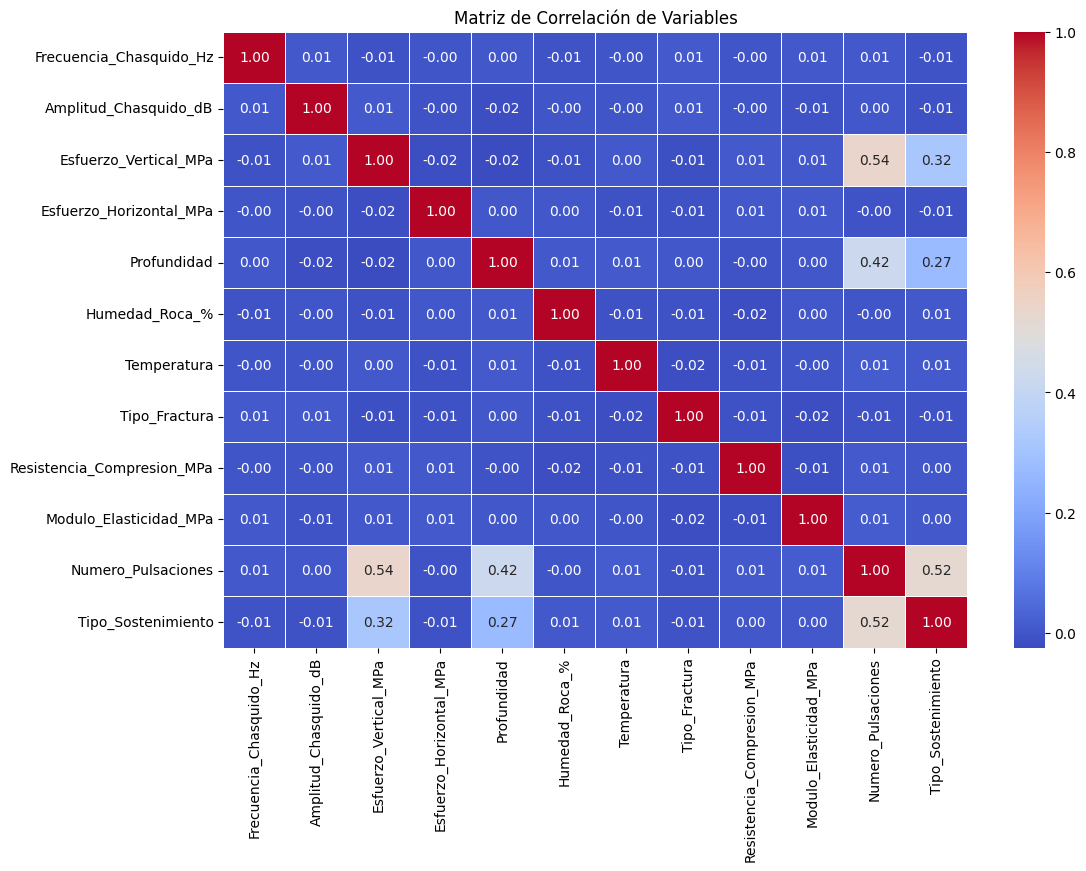

Archivo CSV con características significativas guardado como 'datos_entradas_red_neuronal.csv'


In [68]:
# Correlación de las características numéricas
correlation_matrix = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables')
plt.show()

# Umbral de correlación para seleccionar variables (puedes ajustar este valor)
umbral_correlacion = 0.2

# Seleccionar las características con correlación significativa (> umbral)
significant_features = correlation_matrix.columns[abs(correlation_matrix).gt(umbral_correlacion).any()]

# Filtrar las columnas del DataFrame con las características significativas
df_significant = df[significant_features]

# Guardar el DataFrame filtrado (con las variables significativas) en un archivo CSV
df_significant.to_csv(r'C:\Users\DAVID\Desktop\MECANICA_ROCAS_FREEFEM\MODELO_PREDICCION_SOSTENIMIENTO\DATA\datos_red_neurona_4.csv', index=False)

# Confirmar que el archivo se guardó correctamente
print("Archivo CSV con características significativas guardado como 'datos_entradas_red_neuronal.csv'")